#### Import Libraries

In [145]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### Settings

In [146]:
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Read Data

In [147]:
df = pd.read_csv('diabetes.csv')

## 1. Data Overview

In [148]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [150]:
# Numerical variables selected (Target Variable excluded)
cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Outcome"]

In [151]:
df[cols].nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
dtype: int64

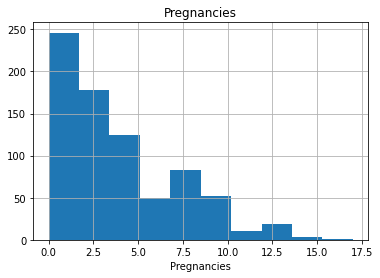

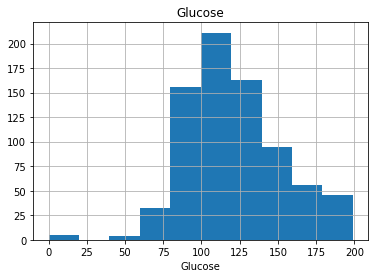

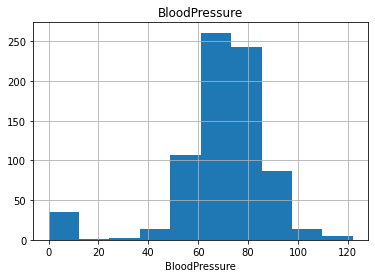

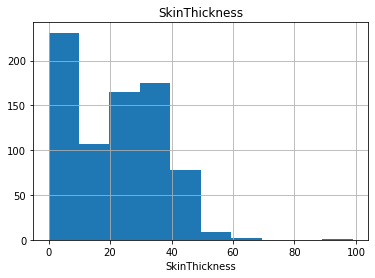

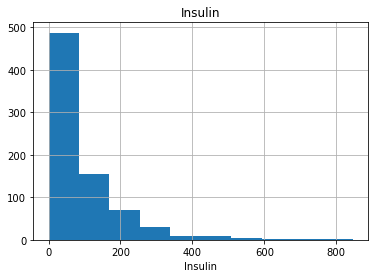

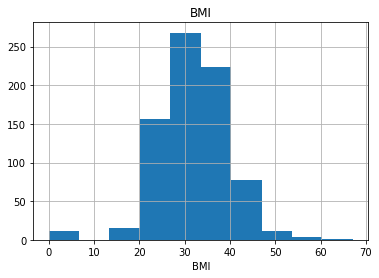

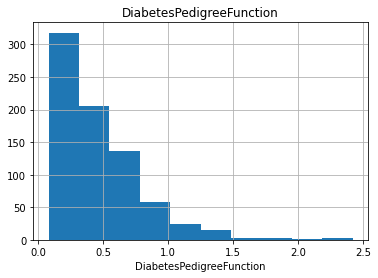

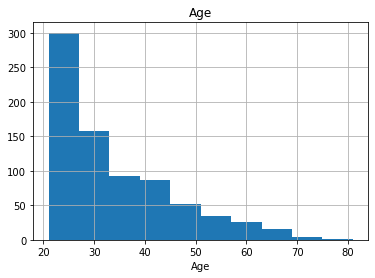

In [152]:
# Plotting each variables histograms
def hist_for_nums(data, numeric_cols):
    for col in numeric_cols:
        data[col].hist()
        plt.xlabel(col)
        plt.title(col)
        plt.show()

hist_for_nums(df, cols)

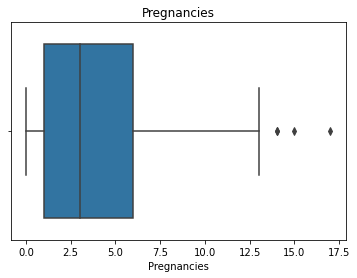

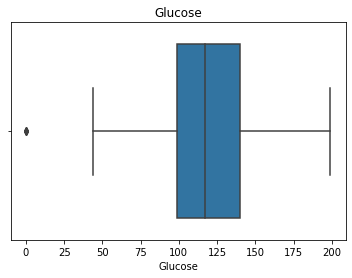

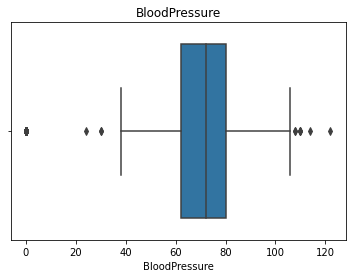

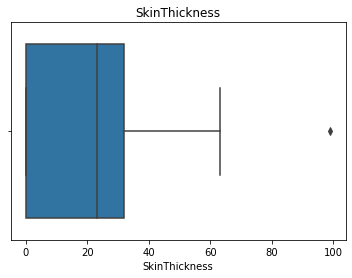

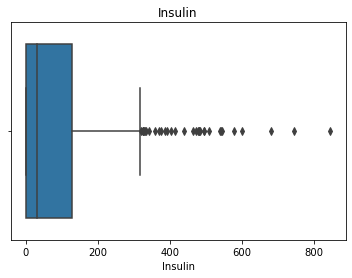

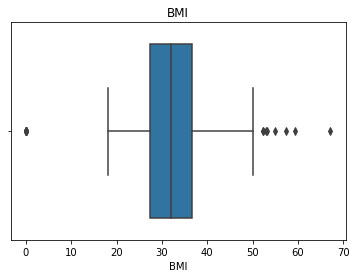

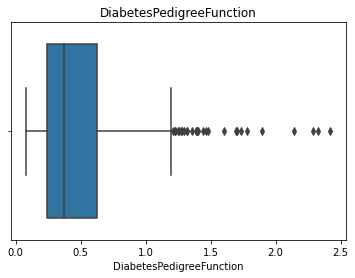

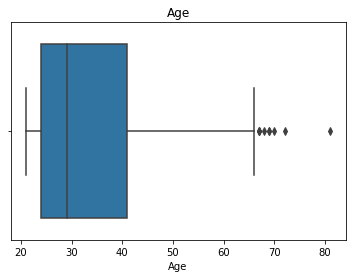

In [153]:
def boxplot_for_nums(data, numeric_cols):
    for col in numeric_cols:
        sns.boxplot(data[col])
        plt.xlabel(col)
        plt.title(col)
        plt.show()

boxplot_for_nums(df, cols)


In [154]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


## 2. Data Processing

 #### Missing Value Treatment


In [155]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [156]:
df[df == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,nan,nan,nan,nan,0.000,nan,nan,nan,nan
1,nan,nan,nan,nan,0.000,nan,nan,nan,0.000
2,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
3,nan,nan,nan,nan,nan,nan,nan,nan,0.000
4,0.000,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...
763,nan,nan,nan,nan,nan,nan,nan,nan,0.000
764,nan,nan,nan,nan,0.000,nan,nan,nan,0.000
765,nan,nan,nan,nan,nan,nan,nan,nan,0.000
766,nan,nan,nan,0.000,0.000,nan,nan,nan,nan


In [157]:
df_zeros = ['Age','BloodPressure','BMI','Glucose','Insulin','SkinThickness']

df[df_zeros]= df[df_zeros].replace(0, np.NaN)

In [158]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

__Glucose__

In [159]:
df.groupby("Outcome")["Glucose"].median()

Outcome
0   107.000
1   140.000
Name: Glucose, dtype: float64

In [160]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

__Blood Pressure__

In [161]:
df.groupby("Outcome")["BloodPressure"].median()


Outcome
0   70.000
1   74.500
Name: BloodPressure, dtype: float64

In [162]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

__Skin Thickness__

In [163]:
df.groupby("Outcome")["SkinThickness"].median()

Outcome
0   27.000
1   32.000
Name: SkinThickness, dtype: float64

In [164]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

__Insulin__

In [165]:
df.groupby("Outcome")["Insulin"].median()

Outcome
0   102.500
1   169.500
Name: Insulin, dtype: float64

In [166]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.500
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.500

__BMI__

In [167]:
df.groupby("Outcome")["BMI"].median()

Outcome
0   30.100
1   34.300
Name: BMI, dtype: float64

In [168]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.100
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.300

In [169]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [170]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.000,76.000,48.000,180.000,32.900,0.171,63,0
764,2,122.000,70.000,27.000,102.500,36.800,0.340,27,0
765,5,121.000,72.000,23.000,112.000,26.200,0.245,30,0
766,1,126.000,60.000,32.000,169.500,30.100,0.349,47,1


#### Outlier Treatment

In [171]:
# Determine Outlier Thresholds of each variable
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [172]:
# Function prints the variables which have values lower than low_limit (Determined by outlier_thresholds function) and higher than high_limit (Determined by outlier_thresholds function).
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")

for col in cols:
    has_outliers(df, col)


Pregnancies yes
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes


In [173]:
# Set outliers to low_limit and up_limit respectively
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, 'BloodPressure')
replace_with_thresholds(df, 'DiabetesPedigreeFunction')
replace_with_thresholds(df, 'Insulin')
replace_with_thresholds(df, 'SkinThickness')

## 3. Feature Engineering

__New Body Fat__

https://www.cambridge.org/core/services/aop-cambridge-core/content/view/DAC8BA25856FCEB30E22F60E0AF80D07/S0007114574000614a.pdf/body_fat_assessed_from_total_body_density_and_its_estimation_from_skinfold_thickness_measurements_on_481_men_and_women_aged_from_16_to_72_years.pdf

In [174]:
df["New_SkinThickness"] = df["SkinThickness"] * 4

In [175]:
# Body fat values are assigned according to skin thickness and age.

df.loc[(df['Age'] >= 21 ) & (df['Age'] <= 29) & (df["New_SkinThickness"] < 34), 'New_Body_Fat'] = "Underfat"
df.loc[(df['Age'] >= 30 ) & (df['Age'] <= 39) & (df["New_SkinThickness"] < 29), 'New_Body_Fat'] = "Underfat"
df.loc[(df['Age'] >= 40 ) & (df['Age'] <= 49) & (df["New_SkinThickness"] < 23), 'New_Body_Fat'] = "Underfat"
df.loc[(df['Age'] >= 50 ) & (df["New_SkinThickness"] < 20), 'New_Body_Fat'] = "Underfat"

df.loc[(df['Age'] >= 21 ) & (df['Age'] <= 29) & (df["New_SkinThickness"] >= 34) & (df["New_SkinThickness"] <= 79), 'New_Body_Fat'] = "Healthy"
df.loc[(df['Age'] >= 30 ) & (df['Age'] <= 39) & (df["New_SkinThickness"] >= 29) & (df["New_SkinThickness"] <= 73), 'New_Body_Fat'] = "Healthy"
df.loc[(df['Age'] >= 40 ) & (df['Age'] <= 49) & (df["New_SkinThickness"] >= 23) & (df["New_SkinThickness"] <= 59), 'New_Body_Fat'] = "Healthy"
df.loc[(df['Age'] >= 50 ) & (df["New_SkinThickness"] >= 20) & (df["New_SkinThickness"] <= 49), 'New_Body_Fat'] = "Healthy"

df.loc[(df['Age'] >= 21 ) & (df['Age'] <= 29) &( df["New_SkinThickness"] > 79) & (df["New_SkinThickness"] <= 120), 'New_Body_Fat'] = "OverFat"
df.loc[(df['Age'] >= 30) & (df['Age'] <= 39) & (df["New_SkinThickness"] > 73) & (df["New_SkinThickness"] <= 115), 'New_Body_Fat'] = "OverFat"
df.loc[(df['Age'] >= 40 ) & (df['Age'] <= 49) & (df["New_SkinThickness"] > 59) & (df["New_SkinThickness"] <= 95), 'New_Body_Fat'] = "OverFat"
df.loc[(df['Age'] >= 50 ) & (df["New_SkinThickness"] > 49) & (df["New_SkinThickness"] <= 77), 'New_Body_Fat'] = "OverFat"

df.loc[(df['Age'] >= 21 ) & (df['Age'] <= 29) & (df["New_SkinThickness"] > 120), 'New_Body_Fat'] = "Obese"
df.loc[(df['Age'] >= 30 ) & (df['Age'] <= 39) & (df["New_SkinThickness"] > 115) , 'New_Body_Fat'] = "Obese"
df.loc[(df['Age'] >= 40 ) & (df['Age'] <= 49) & (df["New_SkinThickness"] > 95) , 'New_Body_Fat'] = "Obese"
df.loc[(df['Age'] >= 50 ) & (df["New_SkinThickness"] > 77) , 'New_Body_Fat'] = "Obese"


In [176]:
df.drop(["SkinThickness","New_SkinThickness"], axis =1, inplace=True)

__Glucose__

In [177]:
# Glucose level under 140 are assigned as No_Risk and above 140 are assigned as Prediabetes.
df.loc[(df["Glucose"] <= 140), "New_Glucose"] = "No_Risk"
df.loc[(df["Glucose"] > 140), "New_Glucose"] = "Prediabetes"

## 4. Encoding

In [178]:
# Categorical variables are selected
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

In [179]:
# Categorical variables are encoded
def one_hot_encoder(dataframe,categorical_cols,nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe,columns = categorical_cols,dummy_na = nan_as_category,drop_first = True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe,new_columns

df,new_cols_ohe = one_hot_encoder(df,cat_cols)

In [180]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Body_Fat_Obese,New_Body_Fat_OverFat,New_Glucose_Prediabetes
0,6,148.000,72.000,169.500,33.600,0.627,50,1,1,0,1
1,1,85.000,66.000,102.500,26.600,0.351,31,0,1,0,0
2,8,183.000,64.000,169.500,23.300,0.672,32,1,1,0,1
3,1,89.000,66.000,94.000,28.100,0.167,21,0,0,1,0
4,0,137.000,40.000,168.000,43.100,1.200,33,1,1,0,0


## 5. Modelling

In [181]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46) # 80% train, 20% test 

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("%s: (%f)" % ("RF", acc))

RF: (0.844156)
